In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage


In [4]:
file_path = "/kaggle/input/iris/Iris.csv"
df = pd.read_csv(file_path)

In [5]:
df.head()
print(df.columns)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [6]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
#Clean the dataset
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
df.drop("Id", axis=1, inplace=True)

#Preprocessing
X = df.drop("Species", axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

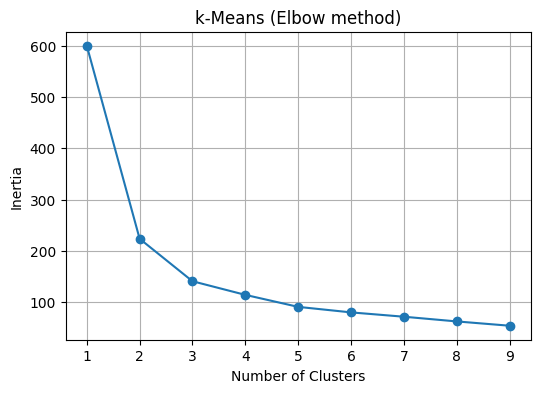

In [14]:
#k-Means (Elbow method) 
inertia = []
k_range = range(1, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(k_range, inertia, marker='o')
plt.title('k-Means (Elbow method)')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


In [15]:
# k-Means with k=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)



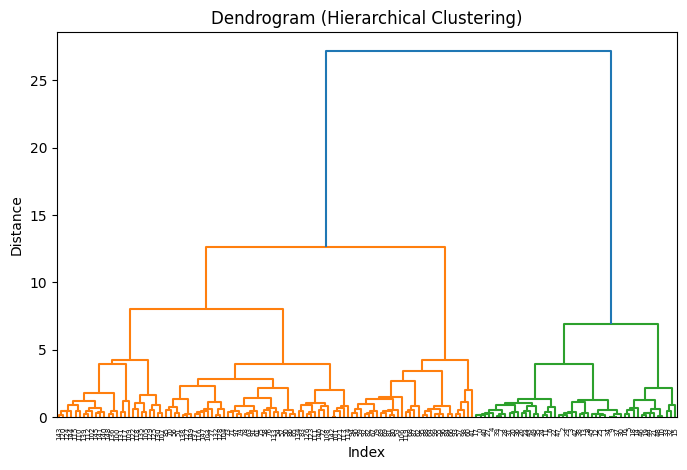

In [18]:
#Dendrogram (Hierarchical Clustering)
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(8, 5))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title("Dendrogram (Hierarchical Clustering)")
plt.xlabel("Index")
plt.ylabel("Distance")
plt.show()

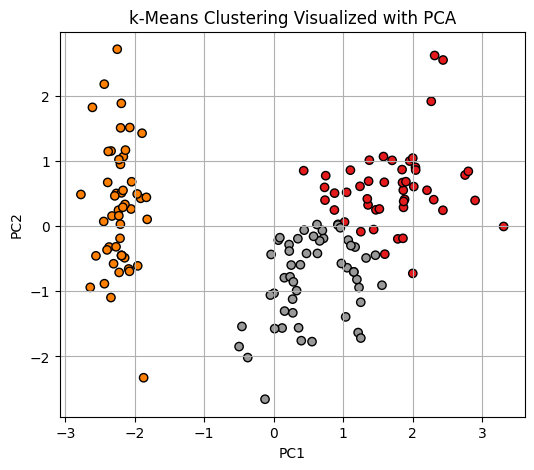

In [17]:
#PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(6, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='Set1', edgecolor='k')
plt.title("k-Means Clustering Visualized with PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()


Real-world Applications of Clustering with Iris Dataset:
- Grouping flowers by petal/sepal measurements to identify species
- Useful in agriculture for breeding or classification without labels
- Can help botanists discover new flower groupings or anomalies
- Demonstrates clustering effectiveness for small, well-separated datasets

SUMMARY

Used the Iris dataset to explore unsupervised learning techniques.

k-Means Clustering: Divides data into k groups by minimizing intra-cluster variance. The elbow method helped choose k=3.

Hierarchical Clustering: Builds nested clusters and visualizes them with a dendrogram.

PCA: Reduced dimensions to 2D for better cluster visualization.

